In [1]:
from metric_voting import Spatial 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
colors = ["#0099cd","#ffca5d","#00cd99","#99cd00","#cd0099","#9900cd","#8dd3c7",
        "#bebada","#fb8072","#80b1d3","#fdb462","#b3de69","#fccde5","#bc80bd",
        "#ccebc5","#ffed6f","#ffffb3","#a6cee3","#1f78b4","#b2df8a","#33a02c",
        "#fb9a99","#e31a1c","#fdbf6f","#ff7f00","#cab2d6","#6a3d9a","#b15928",
        "#64ffda","#00B8D4","#A1887F","#76FF03","#DCE775","#B388FF","#FF80AB",
        "#D81B60","#26A69A","#FFEA00","#6200EA",
    ]
colors2 = colors[:6] + colors[-12::2]
custom_colors = ListedColormap(colors2)

In [3]:
n = 6
m = 3

k = 1

In [4]:
# define the single set of voter and candidate paramters
voter_params = {'loc': [0,0], 'scale': 1, 'size': 2}
candidate_params = {'loc': [0,0], 'scale': 1, 'size': 2}

# define a distance function between voters and candidates
distance = lambda point1, point2: np.linalg.norm(point1 - point2)

# Create the group spatial generator object!
gaussian_generator = Spatial(m = m, voter_dist = np.random.normal, voter_params = voter_params,
                    candidate_dist = np.random.normal, candidate_params = candidate_params,
                    distance = distance)

In [5]:
# Now each call .generate() will make a profile with random candidate and voter positions
profile, candidate_positions, voter_positions, voter_labels = gaussian_generator.generate(n)

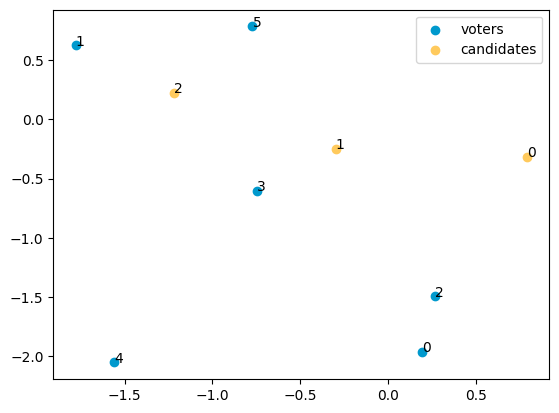

In [6]:
# visualize the results
pal = sns.color_palette("hls", 8)
plt.scatter(x=voter_positions[:,0], y=voter_positions[:,1], label = 'voters', color = colors[0]) 
for i in range(n):
    plt.text(
        voter_positions[i,0], 
        voter_positions[i,1], 
        i,
    )
plt.scatter(candidate_positions[:,0], candidate_positions[:,1], label = 'candidates', color = colors[1])
for i in range(m):
    plt.text(
        candidate_positions[i,0], 
        candidate_positions[i,1], 
        i,
    )
plt.legend()

In [7]:
profile

array([[0, 2, 0, 1, 1, 2],
       [1, 1, 1, 2, 2, 1],
       [2, 0, 2, 0, 0, 0]])

Equation for computing the score:

$$
\text{cost}(B,S) = \sum_{v\in B}\sum_{c\in S} d(v,c)
$$ 


$T$ is the winner set of candidates

$$
\Phi_{prop}(B, T) = \underset{\substack{S\subseteq T\\ |S| = floor(|T|\cdot |B|/n)}}{\text{arg min}} \text{cost}(B,S)
$$

Let $W$ be a winner set of candidates
$$
I(B) = \frac{cost(B, \Phi(B, W))}{cost(B, \Phi(B, C))}
$$

In [8]:
from metric_voting import costs

In [9]:
costs(voter_positions, candidate_positions)

array([12.17000493,  8.78768077,  9.54428154])

In [10]:
voter_positions.shape

(6, 2)

In [11]:
voter_positions[np.newaxis, :, :]

array([[[ 0.19256487, -1.964021  ],
        [-1.77704762,  0.62620732],
        [ 0.26871954, -1.49477049],
        [-0.74893185, -0.60581427],
        [-1.55886615, -2.05302783],
        [-0.77253785,  0.7849239 ]]])

In [12]:
candidate_positions.shape

(3, 2)

In [13]:
candidate_positions[:, np.newaxis, :]

array([[[ 0.78849691, -0.31523975]],

       [[-0.29790066, -0.2474986 ]],

       [[-1.21910525,  0.22703029]]])

In [14]:
diffs = voter_positions[np.newaxis, :, :] - candidate_positions[:, np.newaxis, :]

In [15]:
diffs.shape

(3, 6, 2)